## In this project we are predicting the Diet(non_vegetarian, vegetarian, vegan) of the the dishes

In [112]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

## Data collection

In [113]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fiverr/naj5514/MLEndYD_image_attributes_benchmark.csv").set_index('filename')
df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, 000001.jpg to 003250.jpg
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diet                    3250 non-null   object 
 1   Cuisine_org             3245 non-null   object 
 2   Cuisine                 3245 non-null   object 
 3   Dish_name               3250 non-null   object 
 4   Home_or_restaurant      3250 non-null   object 
 5   Ingredients             3250 non-null   object 
 6   Healthiness_rating      3249 non-null   object 
 7   Healthiness_rating_int  3249 non-null   float64
 8   Likeness                3246 non-null   object 
 9   Likeness_int            3246 non-null   float64
 10  Benchmark_A             3250 non-null   object 
dtypes: float64(2), object(9)
memory usage: 304.7+ KB


# Data preprocessing

Droping Duplicate columns

In [115]:
df = df.drop(columns=['Cuisine_org','Healthiness_rating','Likeness'])

In [116]:
df.head()

,Diet,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating_int,Likeness_int,Benchmark_A
filename,,,,,,,,
000001.jpg,non_vegetarian,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",3.0,4.0,Train
000002.jpg,non_vegetarian,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",2.0,4.0,Train
000003.jpg,non_vegetarian,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",3.0,5.0,Train
000004.jpg,vegetarian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",2.0,5.0,Train
000005.jpg,non_vegetarian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",4.0,5.0,Train


In [117]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Cuisine', 'Home_or_restaurant'], drop_first=True)


In [118]:
df.head()

,Diet,Dish_name,Ingredients,Healthiness_rating_int,Likeness_int,Benchmark_A,Cuisine_african,Cuisine_american,Cuisine_american_italian,Cuisine_american_mexican,...,Home_or_restaurant_wetherspoons,Home_or_restaurant_wicked_burgers,Home_or_restaurant_wngz,Home_or_restaurant_wok&box,Home_or_restaurant_wok_&_box,Home_or_restaurant_ymca_indian_restaurant,Home_or_restaurant_you_me_sushi,Home_or_restaurant_young_cheng_buffet,Home_or_restaurant_yumpees,Home_or_restaurant_yun_gui_chuan
filename,,,,,,,,,,,,,,,,,,,,,
000001.jpg,non_vegetarian,chicken_katsu_rice,"rice,chicken_breast,spicy_curry_sauce",3.0,4.0,Train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000002.jpg,non_vegetarian,english_breakfast,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",2.0,4.0,Train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000003.jpg,non_vegetarian,spicy_chicken,"chili,chicken,peanuts,sihuan_peppercorns,green...",3.0,5.0,Train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000004.jpg,vegetarian,gulab_jamun,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",2.0,5.0,Train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000005.jpg,non_vegetarian,chicken_masala,"chicken,lemon,turmeric,garam_masala,coriander_...",4.0,5.0,Train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the column with label encoding
df['Ingredients_encoded'] = label_encoder.fit_transform(df['Ingredients'])
df['Dish_name_encoded'] = label_encoder.fit_transform(df['Dish_name'])


In [121]:
df = df.drop(columns=['Dish_name','Ingredients'])

In [122]:
df.head()

,Diet,Healthiness_rating_int,Likeness_int,Benchmark_A,Cuisine_african,Cuisine_american,Cuisine_american_italian,Cuisine_american_mexican,Cuisine_arab,Cuisine_arab_spanish,...,Home_or_restaurant_wngz,Home_or_restaurant_wok&box,Home_or_restaurant_wok_&_box,Home_or_restaurant_ymca_indian_restaurant,Home_or_restaurant_you_me_sushi,Home_or_restaurant_young_cheng_buffet,Home_or_restaurant_yumpees,Home_or_restaurant_yun_gui_chuan,Ingredients_encoded,Dish_name_encoded
filename,,,,,,,,,,,,,,,,,,,,,
000001.jpg,non_vegetarian,3.0,4.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2401,495
000002.jpg,non_vegetarian,2.0,4.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1188,881
000003.jpg,non_vegetarian,3.0,5.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,918,2231
000004.jpg,vegetarian,2.0,5.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2839,1073
000005.jpg,non_vegetarian,4.0,5.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,625,514


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, 000001.jpg to 003250.jpg
Columns: 346 entries, Diet to text_features_encoded
dtypes: float64(2), int64(1), object(2), uint8(341)
memory usage: 1.3+ MB


In [123]:
df.isnull().sum()

Diet                                     0
Healthiness_rating_int                   1
Likeness_int                             4
Benchmark_A                              0
Cuisine_african                          0
                                        ..
Home_or_restaurant_young_cheng_buffet    0
Home_or_restaurant_yumpees               0
Home_or_restaurant_yun_gui_chuan         0
Ingredients_encoded                      0
Dish_name_encoded                        0
Length: 347, dtype: int64

In [124]:
df = df.dropna()

# Spliting the data to train and test

In [125]:
train_data = df[df['Benchmark_A'] == 'Train']
test_data = df[df['Benchmark_A'] == 'Test']

In [126]:
train_data = train_data.drop(columns=['Benchmark_A'])
test_data = test_data.drop(columns=['Benchmark_A'])

In [127]:
train_data.head()

,Diet,Healthiness_rating_int,Likeness_int,Cuisine_african,Cuisine_american,Cuisine_american_italian,Cuisine_american_mexican,Cuisine_arab,Cuisine_arab_spanish,Cuisine_argentina,...,Home_or_restaurant_wngz,Home_or_restaurant_wok&box,Home_or_restaurant_wok_&_box,Home_or_restaurant_ymca_indian_restaurant,Home_or_restaurant_you_me_sushi,Home_or_restaurant_young_cheng_buffet,Home_or_restaurant_yumpees,Home_or_restaurant_yun_gui_chuan,Ingredients_encoded,Dish_name_encoded
filename,,,,,,,,,,,,,,,,,,,,,
000001.jpg,non_vegetarian,3.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2401,495
000002.jpg,non_vegetarian,2.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1188,881
000003.jpg,non_vegetarian,3.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,918,2231
000004.jpg,vegetarian,2.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2839,1073
000005.jpg,non_vegetarian,4.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,625,514


In [128]:
train_data.shape

(2272, 346)

In [129]:
test_data.shape

(974, 346)

In [130]:
train_features = train_data.drop(columns=['Diet'])
train_labels = train_data['Diet']

test_features = test_data.drop(columns=['Diet'])
test_labels = test_data['Diet']

In [131]:
train_labels.value_counts()

non_vegetarian    1124
vegetarian         932
vegan              216
Name: Diet, dtype: int64

# Training using ML Modelling

In [162]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have train_features, train_labels, test_features, and test_labels

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=200)
random_forest_model.fit(train_features, train_labels)
rf_predictions = random_forest_model.predict(test_features)
rf_accuracy = accuracy_score(test_labels, rf_predictions)

# Create a Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42, n_estimators=600)
gradient_boosting_model.fit(train_features, train_labels)
gb_predictions = gradient_boosting_model.predict(test_features)
gb_accuracy = accuracy_score(test_labels, gb_predictions)

# Create a Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(train_features, train_labels)
svm_predictions = svm_model.predict(test_features)
svm_accuracy = accuracy_score(test_labels, svm_predictions)

# Create a k-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(train_features, train_labels)
knn_predictions = knn_model.predict(test_features)
knn_accuracy = accuracy_score(test_labels, knn_predictions)

# Display accuracies for all models
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"k-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")

Random Forest Accuracy: 0.7197
Gradient Boosting Accuracy: 0.7433
SVM Accuracy: 0.5329
k-Nearest Neighbors Accuracy: 0.5986


# Evaluations

The Best model is Gradient boosting model(Highest Accuracy)


Confusion Matrix for Gradient boosting model:


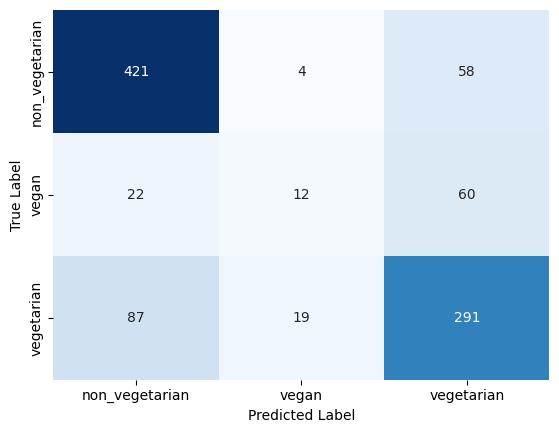

In [165]:
# Display the confusion matrix with a heatmap for the Gradient boosting as an example
print("\nConfusion Matrix for Gradient boosting model:")
conf_matrix_rf = confusion_matrix(test_labels, gb_predictions)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=gradient_boosting_model.classes_, yticklabels=gradient_boosting_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [164]:
# Display the classification report
print("Classification Report:")
print(classification_report(test_labels, gb_predictions))

Classification Report:
                precision    recall  f1-score   support

non_vegetarian       0.79      0.87      0.83       483
         vegan       0.34      0.13      0.19        94
    vegetarian       0.71      0.73      0.72       397

      accuracy                           0.74       974
     macro avg       0.62      0.58      0.58       974
  weighted avg       0.72      0.74      0.72       974

